In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [55]:
data=pd.read_csv("../input/train.csv")

In [56]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [57]:
data.shape

(200000, 202)

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

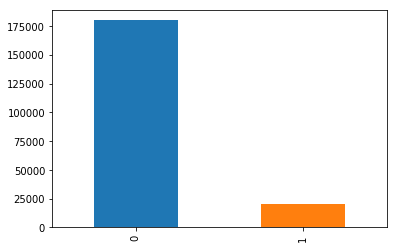

In [59]:
data['target'].value_counts().plot(kind='bar')

In [60]:
total = data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((data.isnull().sum(axis=0)/data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
var_199,0,0.0
var_61,0,0.0
var_71,0,0.0
var_70,0,0.0
var_69,0,0.0
var_68,0,0.0
var_67,0,0.0
var_66,0,0.0
var_65,0,0.0
var_64,0,0.0


In [61]:
data_new=data[data['target']==1]

In [62]:
data_new.shape

(20098, 202)

In [63]:
data_new0=data[data['target']==0]

In [64]:
data_new=data_new.append(data_new0.sample(n=20098,random_state=0))

In [65]:
data_new.shape

(40196, 202)

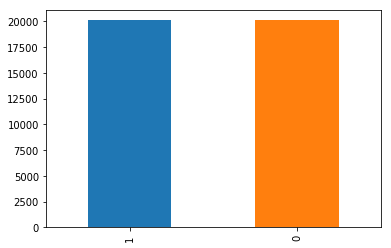

In [66]:
data_new['target'].value_counts().plot(kind='bar')

In [67]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [68]:
scaler.fit(data_new.iloc[:,2:])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [69]:
data_new_std=pd.DataFrame(scaler.transform(data_new.iloc[:,2:]))

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca=PCA(n_components=2)

In [72]:
pca.fit(data_new_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [73]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,0.100374,0.099903,0.100888,0.028727,0.009028,0.046008,0.119588,-0.013280,0.046369,-0.108338,0.000350,0.054440,-0.157458,-0.142136,-0.022240,0.041663,0.022130,0.025757,0.107368,0.027109,-0.045806,-0.114737,0.124939,-0.047451,0.057758,0.033108,0.125213,0.005341,-0.050434,0.000184,-0.007334,-0.051375,0.043740,-0.078300,-0.105186,0.075825,-0.094145,0.030058,-0.010265,-0.025929,...,-0.016203,0.009487,0.093611,0.072083,0.090865,-0.119586,-0.110600,0.07286,0.039443,-0.094570,0.095399,0.043118,-0.070609,0.084460,-0.118653,0.053973,0.017885,-0.069972,-0.020378,0.110853,0.077652,0.011830,0.007858,-0.013615,0.106953,-0.014497,-0.065754,0.015804,-0.065476,0.019179,0.125900,0.102845,-0.095658,-0.023306,-0.062852,0.053019,0.063538,-0.056624,-0.105278,0.047674
1,-0.038548,-0.012767,0.006767,-0.095606,0.140265,-0.093052,0.005206,0.087148,0.047720,0.074997,0.015584,0.124373,0.019829,0.140337,0.100562,0.161647,-0.122328,-0.066889,0.042137,-0.042004,0.015164,-0.176602,0.133135,0.080271,-0.068187,0.059569,-0.073402,-0.088157,0.061554,0.034270,-0.065951,-0.026003,-0.062714,0.093839,0.030473,0.048278,0.043037,-0.132223,-0.042964,-0.064912,...,0.038977,-0.001325,0.000695,0.087547,-0.082564,0.030315,0.036325,0.08449,0.046928,-0.013054,0.121885,0.023629,-0.063206,0.070149,0.002701,-0.036657,0.112508,0.107423,0.020262,-0.032937,0.006077,-0.123071,0.064922,-0.015060,0.003157,0.003648,0.073900,0.010105,0.052935,-0.086644,0.074937,-0.026152,0.024647,0.091203,0.100132,-0.098080,-0.006944,-0.040660,0.085622,0.090913


In [74]:
pca_data=pd.DataFrame(pca.transform(data_new_std))

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pca_data, data_new['target'], test_size=0.2, random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(n_jobs=-1)

In [77]:
model.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
y_pred=pd.DataFrame(model.predict(X_test))

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[3121,  928],
       [ 893, 3098]])

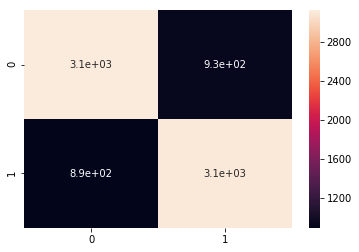

In [80]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

In [81]:
(3106+3117)/(874+943+3106+3117)

0.7740049751243782

In [82]:
test_data=pd.read_csv("../input/test.csv")

In [87]:
scaler.fit(test_data.iloc[:,1:])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [88]:
test_data_std=pd.DataFrame(scaler.transform(test_data.iloc[:,1:]))

In [85]:
# pca.fit(test_data_std)

In [89]:
test_data_X=pd.DataFrame(pca.transform(test_data_std))

In [90]:
(pd.DataFrame(model.predict(test_data_X))).shape

(200000, 1)

In [91]:
submission=pd.read_csv("../input/sample_submission.csv")

In [92]:
submission.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [94]:
submission['target']=model.predict(test_data_X)

In [95]:
submission

,ID_code,target
0,test_0,1
1,test_1,1
2,test_2,0
3,test_3,1
4,test_4,1
5,test_5,0
6,test_6,0
7,test_7,1
8,test_8,0
9,test_9,0


In [98]:
submission.to_csv("submission1.csv",index=False)